In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('places.csv')

In [4]:
data.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [5]:
data.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0                            int64
Zone                                 object
State                                object
City                                 object
Name                                 object
Type                                 object
Establishment Year                   object
time needed to visit in hrs         float64
Google review rating                float64
Entrance Fee in INR                   int64
Airport with 50km Radius             object
Weekly Off                           object
Significance                         object
DSLR Allowed                         object
Number of google review in lakhs    float64
Best Time to visit                   object
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,325.0,162.000000,93.963645,0.00,81.000,162.00,243.0,324.0
time needed to visit in hrs,325.0,1.807692,0.971398,0.50,1.000,1.50,2.0,7.0
Google review rating,325.0,4.486154,0.274580,1.40,4.400,4.50,4.6,4.9
Entrance Fee in INR,325.0,115.809231,530.859785,0.00,0.000,0.00,40.0,7500.0
Number of google review in lakhs,325.0,0.408438,0.646668,0.01,0.059,0.17,0.5,7.4


In [8]:
data.isnull().sum()

Unnamed: 0                            0
Zone                                  0
State                                 0
City                                  0
Name                                  0
Type                                  0
Establishment Year                    0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

<Axes: >

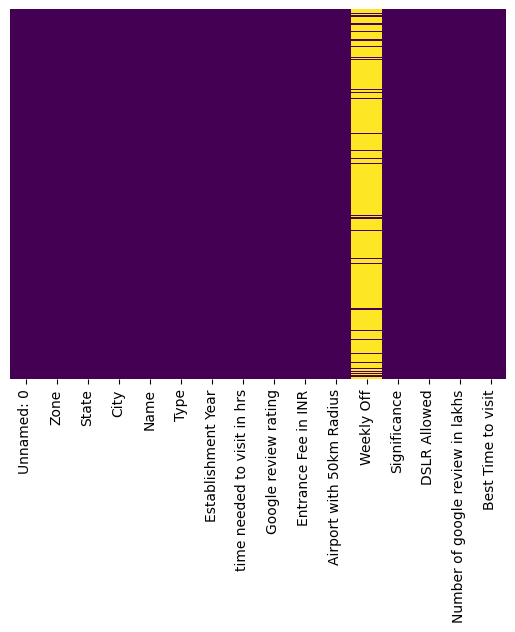

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
data.corr(numeric_only=True)

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs
Unnamed: 0,1.000000,-0.137945,0.155598,-0.092472,-0.081830
time needed to visit in hrs,-0.137945,1.000000,-0.195736,0.281676,-0.010589
Google review rating,0.155598,-0.195736,1.000000,-0.048511,0.067170
Entrance Fee in INR,-0.092472,0.281676,-0.048511,1.000000,0.045612
Number of google review in lakhs,-0.081830,-0.010589,0.067170,0.045612,1.000000


## DATA ANALYSIS PART

In [11]:
# WHAT ARE TOP 5 VISITING PLACES TYPE?

In [12]:
types_names=data.Type.value_counts().index

In [13]:
types_val=data.Type.value_counts().values

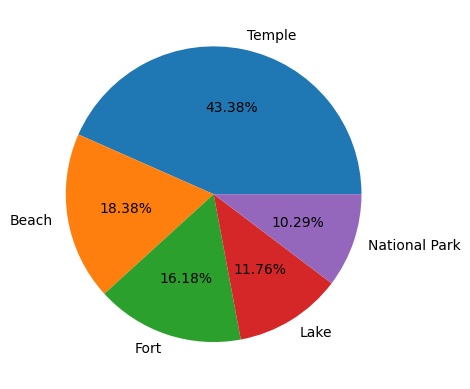

In [14]:
plt.pie(types_val[:5],labels=types_names[:5],autopct='%1.2f%%')
plt.show()

 * FOUND TEMPLE, BEACH, FORT, LAKE, NATIONAL PARK RESPECTIVELY ARE THE TOP 5 VISITING PLACES TYPE

In [15]:
## PERCENTAGE OF DSLR ALLOWED AND WHICH TYPE AND NAME PLACES IT'S NOT ALLOWED

In [16]:
dslr_counts = data['DSLR Allowed'].value_counts()

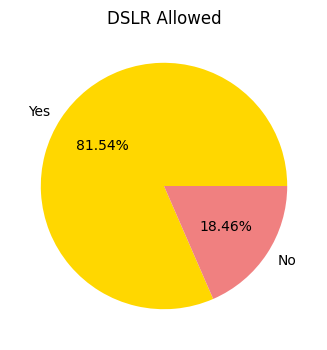

In [17]:
plt.figure(figsize=(8,4))
plt.pie(dslr_counts.values, labels=dslr_counts.index, autopct='%1.2f%%', colors=['gold', 'lightcoral'])
plt.title('DSLR Allowed')
plt.show()

In [18]:
places_not_allowed = data[data['DSLR Allowed'] == 'No'][['Name', 'Type']].drop_duplicates()
print("Places where DSLRs are not allowed:")
for idx, row in places_not_allowed.iterrows():
    print(f"{row['Name']}: {row['Type']}")

Places where DSLRs are not allowed:
Akshardham Temple: Temple
Siddhivinayak Temple: Temple
Mahalaxmi Temple: Temple
Haji Ali Dargah: Religious Shrine
Vidhana Soudha: Government Building
Birla Mandir: Temple
Howrah Bridge: Bridge
Dwarkadhish Temple: Temple
Somnath Temple: Temple
Ajmer Sharif Dargah: Shrine
Dilwara Temples: Temple
Padmanabhaswamy Temple: Temple
Badami Cave Temples: Cave
Murudeshwar Temple: Temple
Halebidu Hoysaleswara Temple: Temple
Sai Baba Temple: Temple
Ganapatipule Temple: Temple
Mahalakshmi Temple: Temple
Mahakaleshwar Jyotirlinga: Temple
Dalai Lama Temple: Temple
Badrinath Temple: Temple
Gangotri Temple: Temple
Tungnath Temple: Temple
Kashi Vishwanath Temple: Temple
Bara Imambara: Monument
Krishna Janmabhoomi: Temple
Ram Janmabhoomi: Religious Site
Banke Bihari Temple: Temple
Augarnath Temple: Temple
Vaishno Devi: Temple
Thiksey Monastery: Monastery
Diskit Monastery: Monastery
Kankalitala Temple: Temple
Hangseswari Temple: Temple
Jagannath Temple: Temple
Lingaraj T

In [19]:
## ## Which is the state with most visiting places?

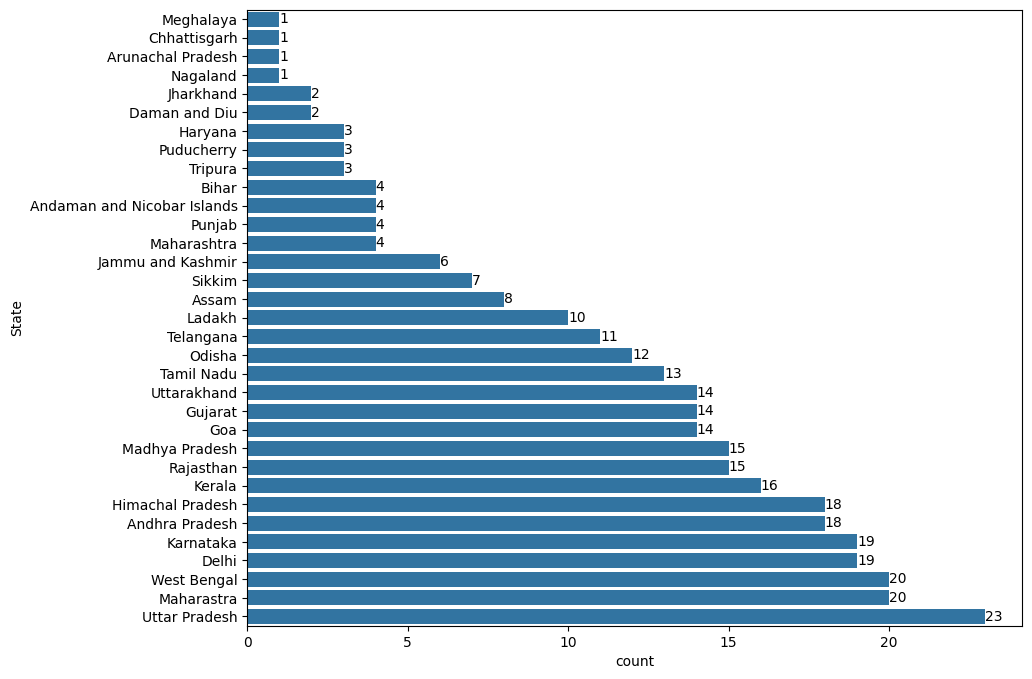

In [20]:
state_counts = data['State'].value_counts().sort_values()
plt.figure(figsize=(10, 8))
sns.countplot(y='State', data=data, order=state_counts.index)
for i, count in enumerate(state_counts):
    plt.text(count, i, str(count), ha='left', va='center')


In [21]:
## Zone-wise Distribution(Bar chart)

In [22]:
zone_counts = data['Zone'].value_counts()


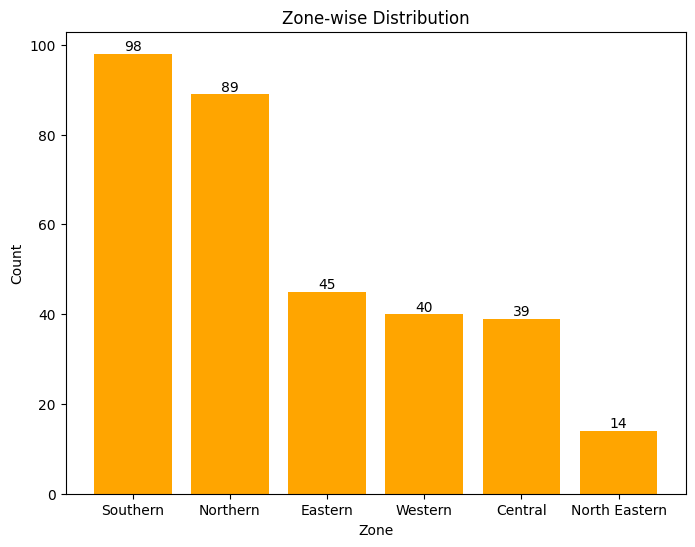

In [25]:
plt.figure(figsize=(8, 6))
bars = plt.bar(zone_counts.index, zone_counts.values, color='orange')
plt.title('Zone-wise Distribution')
plt.xlabel('Zone')
plt.ylabel('Count')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')
plt.show()


In [26]:
## Line chart Google Review Rating over Establishment Year

In [27]:
sorted_data = data.sort_values(by='Establishment Year')


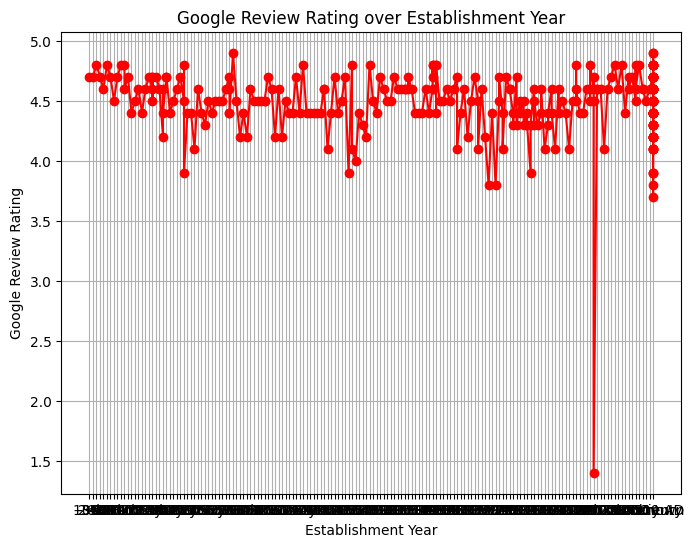

The point where the Google review rating drops: 2013


,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
146,146,Central,Madhya Pradesh,Mandu,Jahaz Mahal,Site,1500,1.0,3.9,50,No,NaN,Historical,Yes,0.030,Afternoon
242,242,Southern,Tamil Nadu,Kodaikanal,Kodaikanal Lake,Lake,1863,2.0,3.9,0,No,NaN,Recreational,Yes,0.100,Morning
176,176,Northern,Uttarakhand,Ranikhet,Chaubatia Gardens,Orchard,1868,1.0,4.0,50,No,NaN,Recreational,Yes,0.025,All
103,103,Southern,Kerala,Kumarakom,Kumarakom Bird Sanctuary,Bird Sanctuary,1972,2.0,3.8,50,Yes,NaN,Wildlife,Yes,0.100,All
167,167,Northern,Himachal Pradesh,Kufri,Kufri Fun World,Ski Resort,1975,5.0,3.8,1500,Yes,NaN,Recreational,Yes,0.100,All
65,65,Southern,Goa,Goa,Dr. Salim Ali Bird Santuary,Bird Sanctuary,1988,2.0,3.9,10,Yes,NaN,Wildlife,Yes,0.030,Afternoon
26,26,Western,Maharastra,Lonavala,Imagicaa,Amusement Park,2013,5.0,1.4,1149,No,Monday,Recreational,Yes,0.950,All
264,264,Southern,Andhra Pradesh,Visakhapatnam,Matsyadarshini Aquarium,Aquarium,Unknown,1.0,3.8,20,Yes,NaN,Recreational,Yes,0.030,All
100,100,Southern,Kerala,Kozhikode,Kozhikode Beach,Beach,Unknown,1.5,3.9,0,Yes,NaN,Recreational,Yes,0.059,All
236,236,Southern,Tamil Nadu,Chennai,Marina Beach,Beach,Unknown,1.5,3.9,0,Yes,NaN,Recreational,Yes,0.100,Morning


In [28]:
plt.figure(figsize=(8, 6))
plt.plot(sorted_data['Establishment Year'], sorted_data['Google review rating'], marker='o', color='red')
plt.title('Google Review Rating over Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Google Review Rating')
plt.grid(True)
plt.show()
rating_diff = sorted_data['Google review rating'].diff()
decrease_point = rating_diff.idxmin()
print("The point where the Google review rating drops:", sorted_data.loc[decrease_point, 'Establishment Year'])
years_outliers = sorted_data[sorted_data['Google review rating'] <=4]
years_outliers

In [29]:
### IS THERE ANY REALTION BETWEEN ENTRANCE FEE VS TIME NEEDED TO VISIT

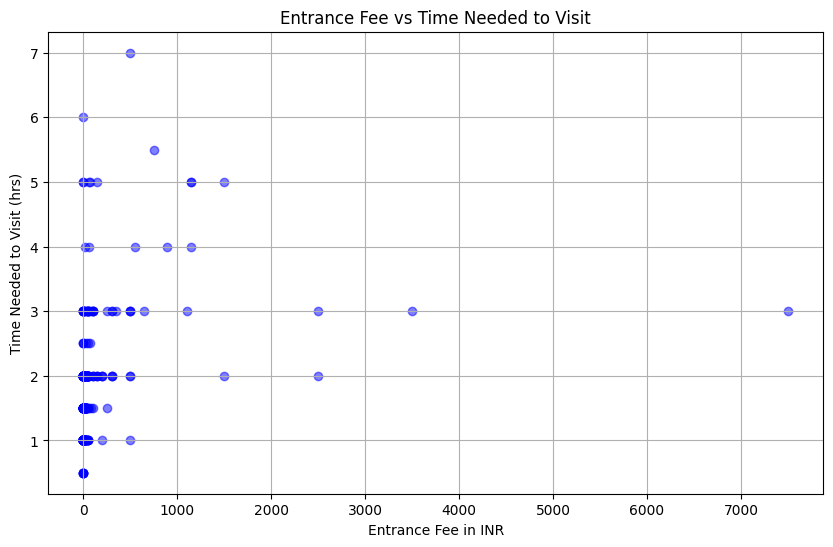

In [30]:
entrance_fee = data['Entrance Fee in INR']  
time_to_visit = data['time needed to visit in hrs']  
plt.figure(figsize=(10, 6))
plt.scatter(entrance_fee, time_to_visit, color='blue', alpha=0.5)
plt.xlabel('Entrance Fee in INR')
plt.ylabel('Time Needed to Visit (hrs)')
plt.title('Entrance Fee vs Time Needed to Visit')
plt.grid(True)
plt.show()


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt



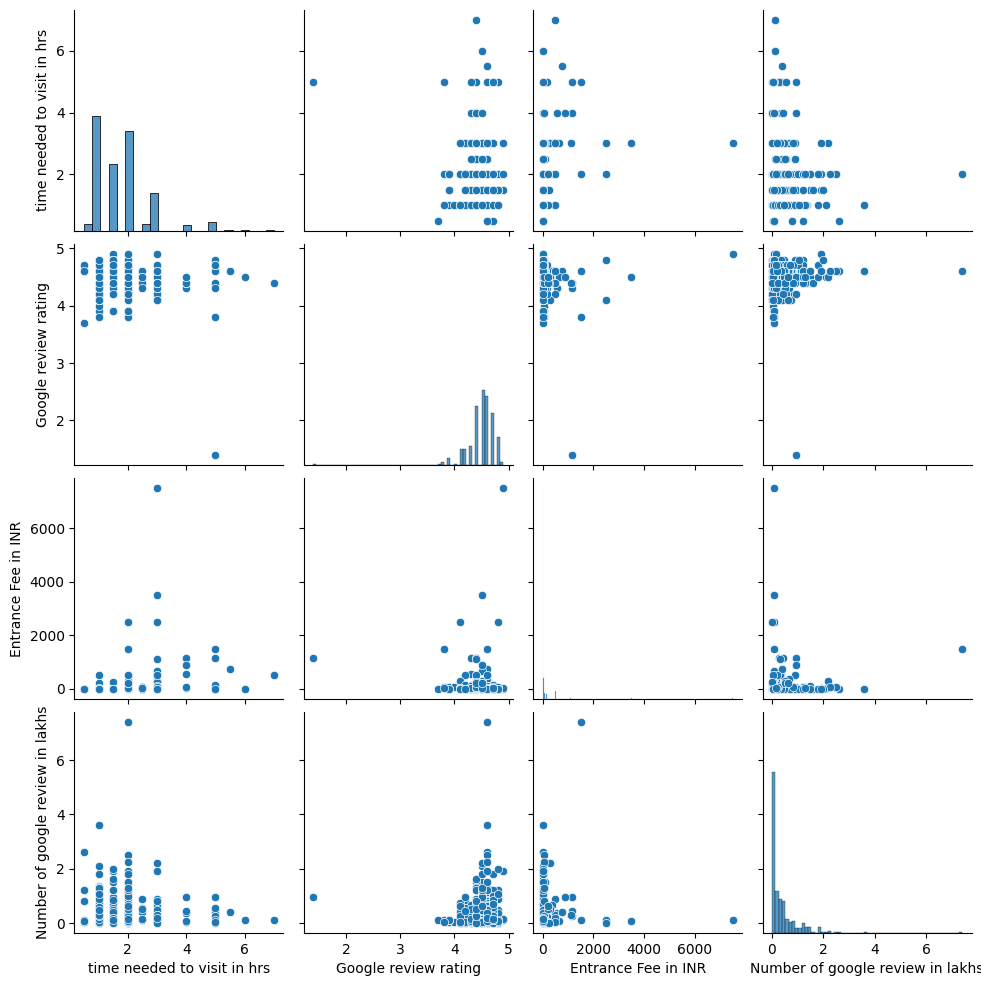

In [32]:
numerical_attributes = ['Establishment Year', 'time needed to visit in hrs', 
                      'Google review rating', 'Entrance Fee in INR', 
                      'Number of google review in lakhs']
if len(data['Zone'].unique()) <= 10:
    numerical_attributes.append('Zone')
if len(data['State'].unique()) <= 10:
    numerical_attributes.append('State')
sns.pairplot(data[numerical_attributes])
plt.show()

In [33]:
## DATA PREPROCESSING

In [34]:
## Convert 'Unknown' values in 'Establishment_Year' to NaN & Impute NaN values with median

In [35]:
data['Establishment Year'] = pd.to_numeric(data['Establishment Year'], errors='coerce')
median_year = data['Establishment Year'].median()
data['Establishment Year'].fillna(median_year, inplace=True)
print(data['Establishment Year'])
print(data['Establishment Year'][0:17])

0      1921.0
1      1572.0
2      2005.0
3      2019.0
4      1724.0
        ...  
320    1992.0
321    1565.0
322    2013.0
323    1727.0
324    1887.0
Name: Establishment Year, Length: 325, dtype: float64
0     1921.0
1     1572.0
2     2005.0
3     2019.0
4     1724.0
5     1700.0
6     1986.0
7     1648.0
8     1400.0
9     1600.0
10    2003.0
11    1500.0
12    1954.0
13    1959.0
14    1192.0
15    1992.0
16    1876.0
Name: Establishment Year, dtype: float64


In [36]:
## SPLIT THE DATASET INTO TRAINING AND TESTING

In [38]:
X = data[['Establishment Year', 'Google review rating']]
y = data['Number of google review in lakhs'] > data['Number of google review in lakhs'].median() 


In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf=RandomForestClassifier()

In [52]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [55]:
accuracy = accuracy_score(y_test, y_pred)

In [56]:
print(accuracy)

0.6461538461538462


In [57]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7352941176470589


In [58]:
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(recall)

0.6410256410256411


In [59]:
print(f1)

0.684931506849315


## Decision tree classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
clf=DecisionTreeClassifier()

In [65]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = clf.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)

In [68]:
print(accuracy)

0.6153846153846154


In [69]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.71875


In [70]:
recall = recall_score(y_test, y_pred)
print(recall)

0.5897435897435898


In [71]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.647887323943662


## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
reg=LogisticRegression()

In [74]:
reg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = reg.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)

In [77]:
print(accuracy)

0.4


In [78]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.5


In [79]:
recall = recall_score(y_test, y_pred)
print(recall)

0.05128205128205128


In [80]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.09302325581395349


## HYPERTUNE THE MODE TO FIND THE BEST PARAMETER

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_grid={
    'max_depth': list(range(1, 16)),
    'min_samples_split':list(range(2,15)),
    'max_features':list(range(2,15)),
    'min_samples_leaf':list(range(1, 16)),
    'max_leaf_nodes':list(range(1, 16))
}


In [84]:
rcv=RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=param_grid,n_iter=20,cv=5,verbose=True)

In [85]:
rcv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", li

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14]},
                   verbose=True)

In [86]:
rcv.best_score_

0.5876923076923077

In [87]:
rcv.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 14,
 'max_leaf_nodes': 9,
 'max_features': 6,
 'max_depth': 8}

In [88]:
rcv_random=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid,n_iter=20,cv=5,verbose=True)

In [89]:
rcv_random.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14]},
                   verbose=True)

In [90]:
rcv_random.best_score_

0.5907692307692308

In [91]:
rcv_random.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 3,
 'max_features': 11,
 'max_depth': 5}